Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 .

The data table consists of weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. 
The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.


Our objective is to make a mode that can consider the data provided predict the Avocado’s Average Price based on different features.


Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Identifying Type: our model which is going to be the Linear Regression because our Target variable 'AveragePrice' is continuous.






In [39]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [6]:
df=pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


There are 18249 rows and 14 columns in our dataset

In [7]:
#checking the datatype of each column 
print(df.dtypes)
# All features are of integer except ERA which is float
print(df.info())

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 

In [8]:
#Checking rows and columns in the dataset
df.shape

(18249, 14)

In [9]:
#Lets remove the column 'unnamed' as it doesnt make any sense for the data
df.drop('Unnamed: 0',axis=1, inplace=True)

In [10]:
df.info()

#the data contains both numeric and categorical variable.
# We have 3 categorical variables date,type and region either should be removed or convert to numeric value.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [11]:
# Statistica info about the data.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


No missing values observed from statistics.
Average price minimum is 0.44 and max upto 3.25.
Data speaks about the year 2015-2018.


# EDA (Exploratory data analysis)

In [12]:
# Lets check for null values.
df.isnull().sum()

# There is no null values .

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

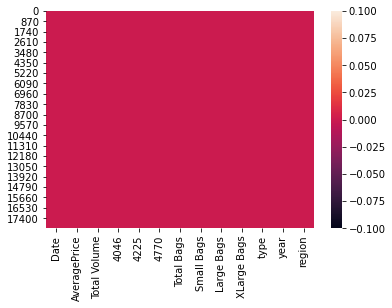

In [13]:
#checking null values using heat map
sns.heatmap(df.isnull())
#we can see that their is no null values

In [14]:
#Checking column names
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [15]:
# Column type has only 1 value which is conventional which is not going to affect the average price. 
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [16]:
# count of the values based on year
df['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

In [17]:
#Using Label Encoder to convert all categorial data into numbers
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['type','region','year']
for i in list1:
    df[i]=le.fit_transform(df[i].astype(str))

In [18]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int32
region            int32
dtype: object

# Univariate Analysis

AveragePrice       AxesSubplot(0.125,0.657941;0.0945122x0.222059)
Total Volume    AxesSubplot(0.238415,0.657941;0.0945122x0.222059)
4046            AxesSubplot(0.351829,0.657941;0.0945122x0.222059)
4225            AxesSubplot(0.465244,0.657941;0.0945122x0.222059)
4770            AxesSubplot(0.578659,0.657941;0.0945122x0.222059)
Total Bags      AxesSubplot(0.692073,0.657941;0.0945122x0.222059)
Small Bags      AxesSubplot(0.805488,0.657941;0.0945122x0.222059)
Large Bags         AxesSubplot(0.125,0.391471;0.0945122x0.222059)
XLarge Bags     AxesSubplot(0.238415,0.391471;0.0945122x0.222059)
type            AxesSubplot(0.351829,0.391471;0.0945122x0.222059)
year            AxesSubplot(0.465244,0.391471;0.0945122x0.222059)
region          AxesSubplot(0.578659,0.391471;0.0945122x0.222059)
dtype: object

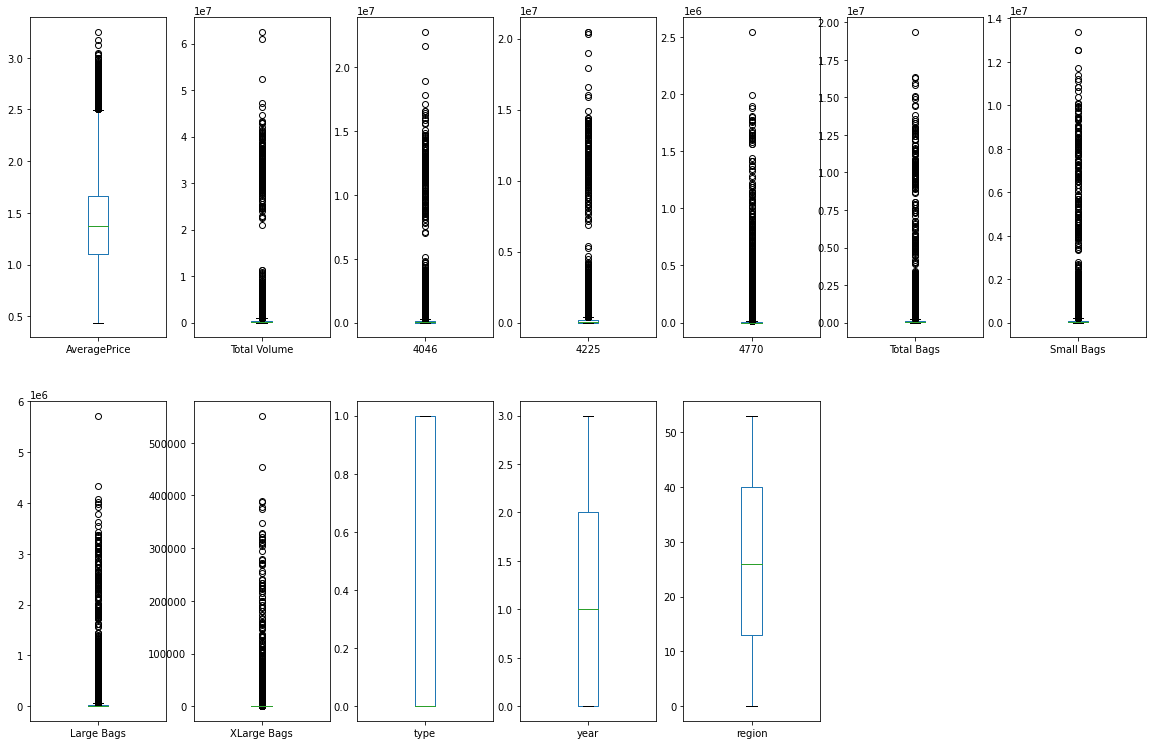

In [19]:
#from below observation we can say lots of outliers are present in the data set
df.plot(kind='box',subplots=True,layout=(3,7),figsize=(20,20))

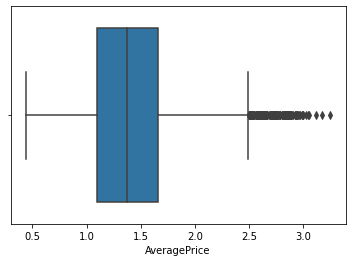

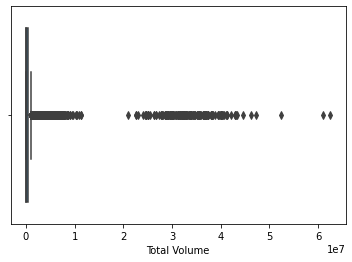

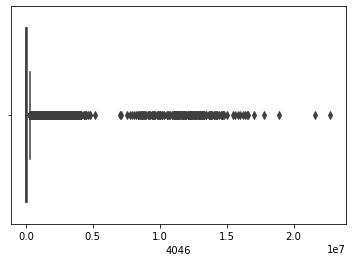

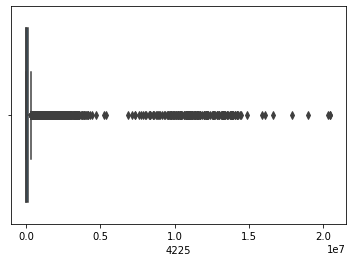

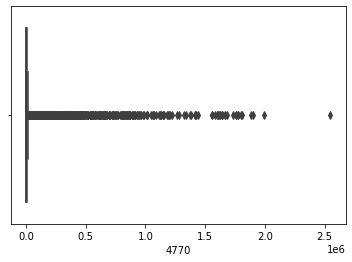

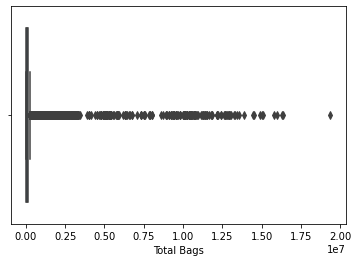

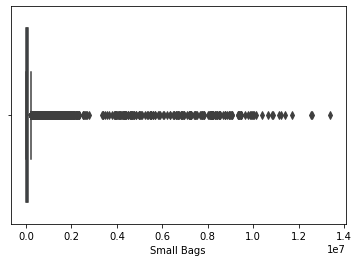

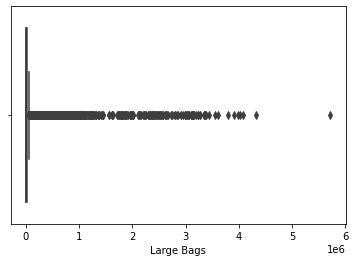

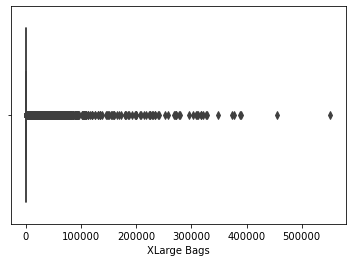

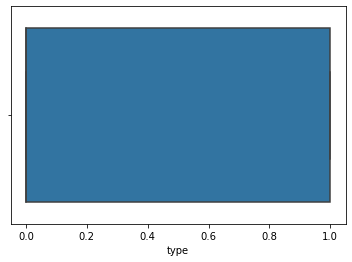

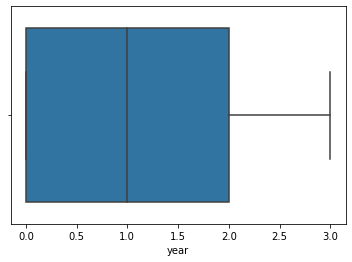

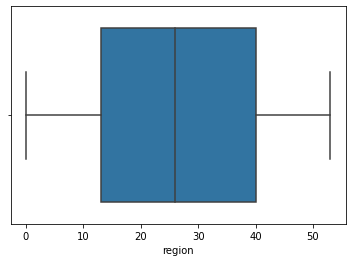

In [20]:
# Cheacking whether the columns has outliers or not
for i in df.describe().columns:
    sns.boxplot(df[i])
    plt.show()

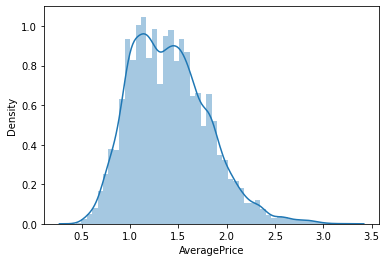

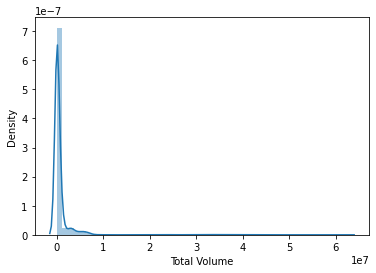

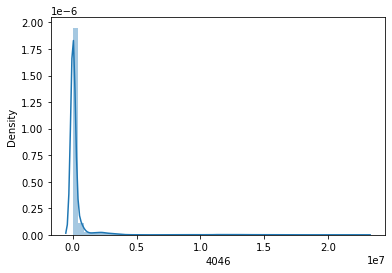

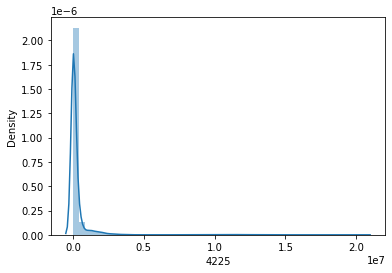

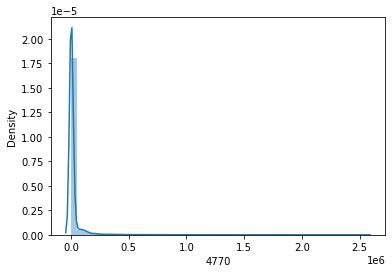

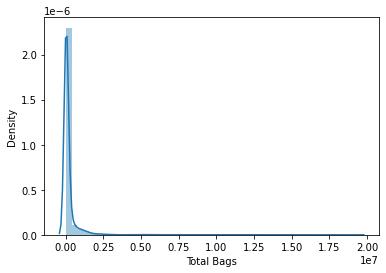

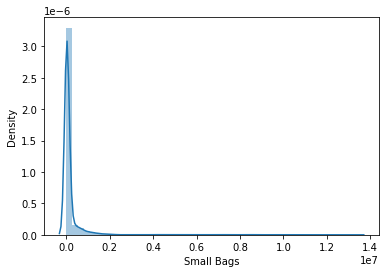

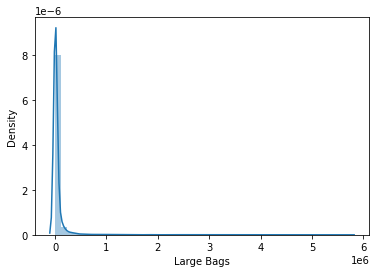

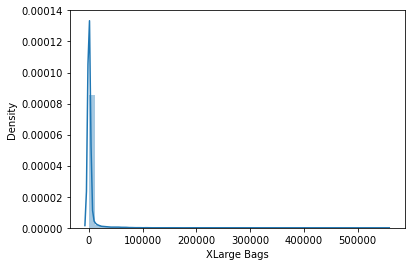

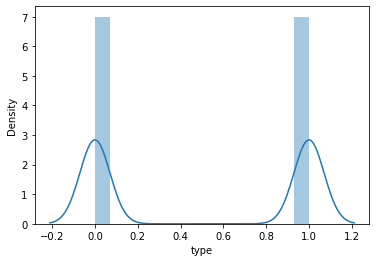

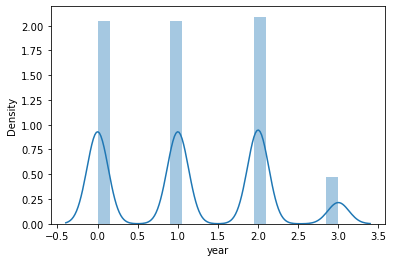

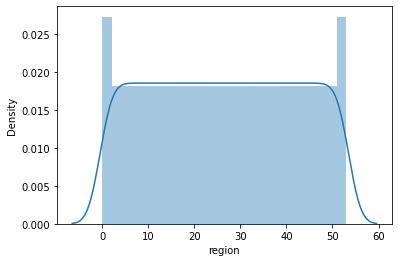

In [21]:
#checking wheather the columns are normally distributed or not

for i in df.describe().columns:
    sns.distplot(df[i])
    plt.show()

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>],
       [<AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>],
       [<AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>],
       [<AxesSubplot:title={'center':'type'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'region'}>]], dtype=object)

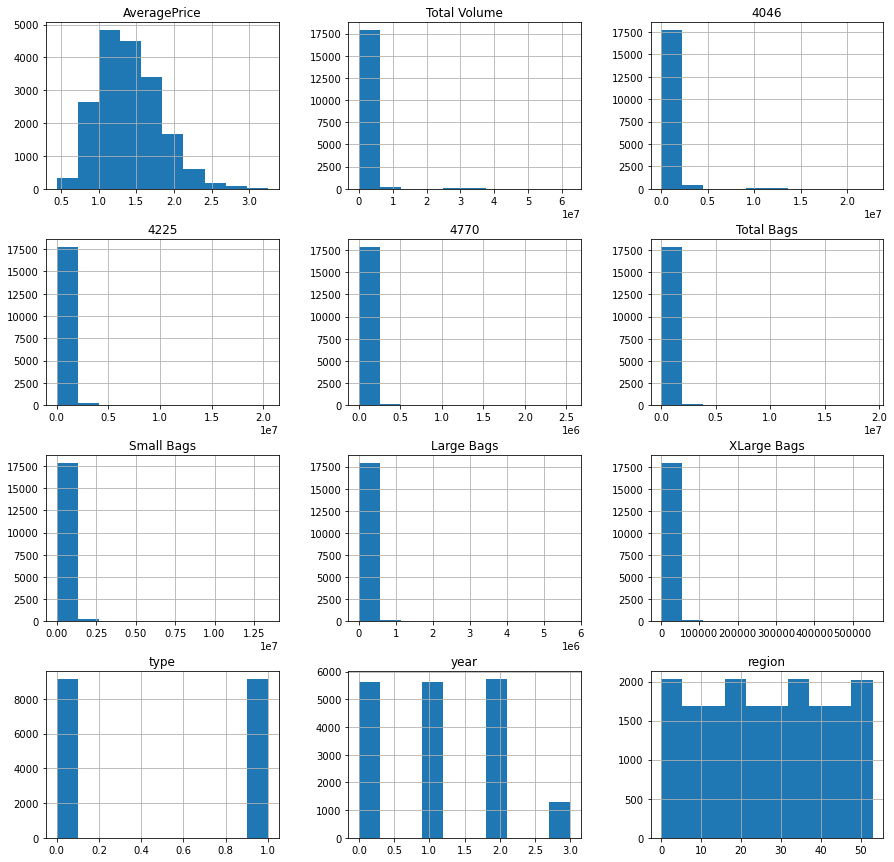

In [22]:
df.hist(figsize=(15,15),bins=10)

<AxesSubplot:xlabel='year', ylabel='count'>

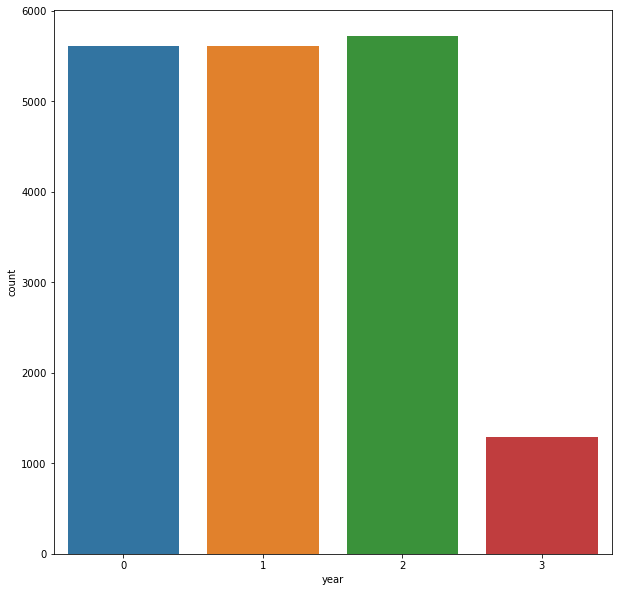

In [23]:
plt.figure(figsize=[10,10])
sns.countplot(x = 'year', data = df)

# Univariate Analysis

Text(0, 0.5, 'Total Volume')

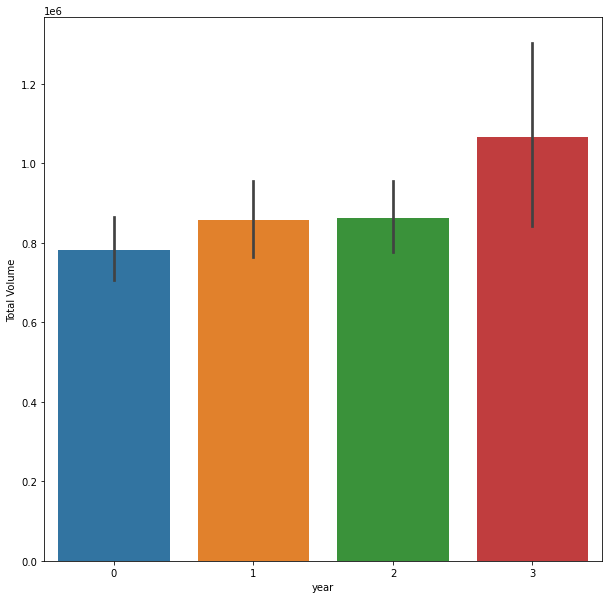

In [24]:
plt.figure(figsize=(10,10))
sns.barplot(x="year",y="Total Volume",data=df)
plt.xlabel("year")
plt.ylabel("Total Volume")

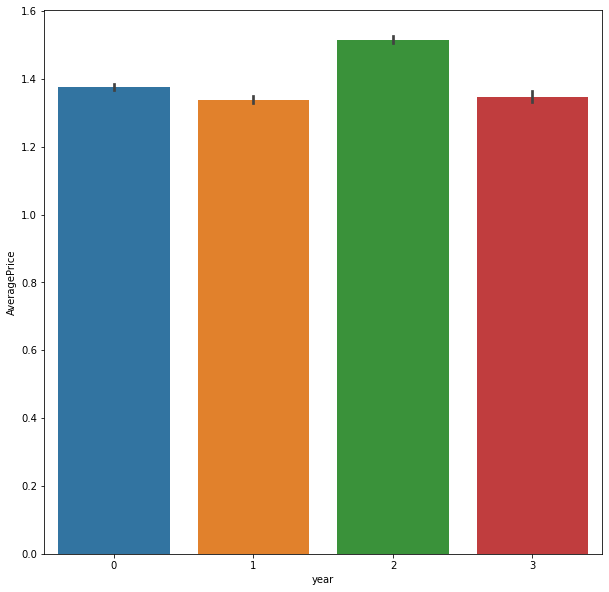

In [25]:
plt.figure(figsize=(10,10))
sns.barplot(x ="year",y="AveragePrice",data=df)
plt.xlabel("year")
plt.ylabel("AveragePrice")
plt.show()

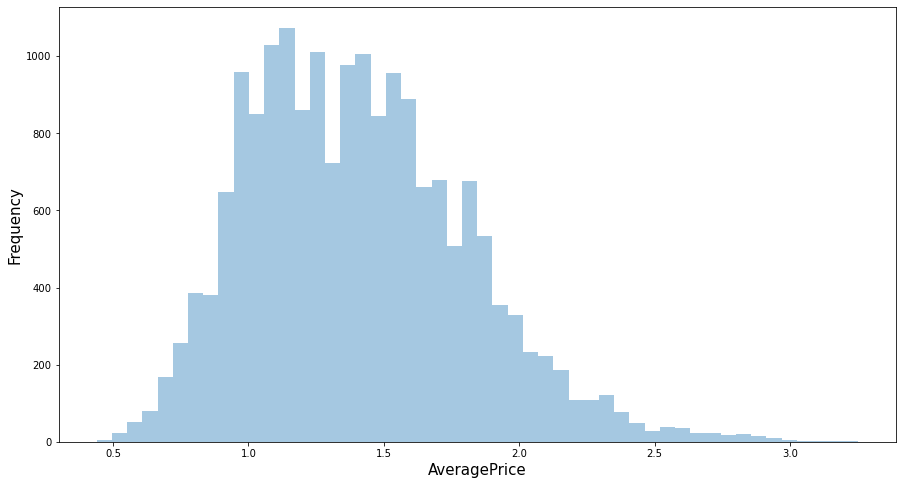

In [26]:
plt.figure(figsize=(15,8))
sns.distplot(df["AveragePrice"],bins=50,kde=False )
plt.xlabel("AveragePrice", Size=15)
plt.ylabel("Frequency", Size=15)
plt.show()

Text(0.5, 1.0, 'Average Price')

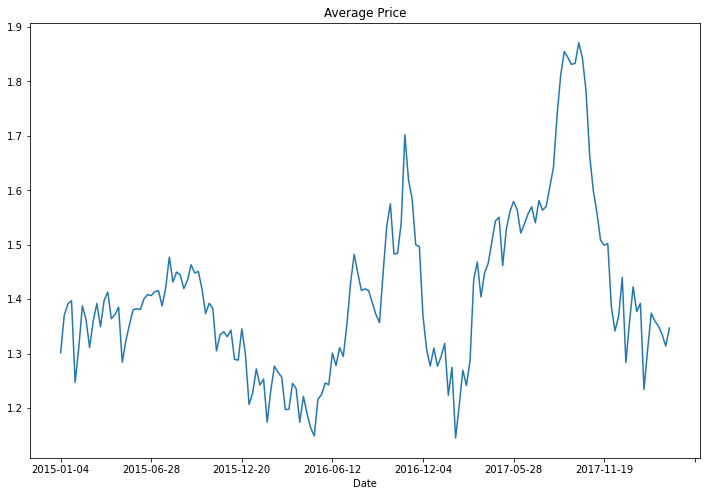

In [27]:
# Avocado's Average Price with respect to the Date
avg_price_date=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
avg_price_date['AveragePrice'].plot()
plt.title('Average Price')

<AxesSubplot:xlabel='region', ylabel='count'>

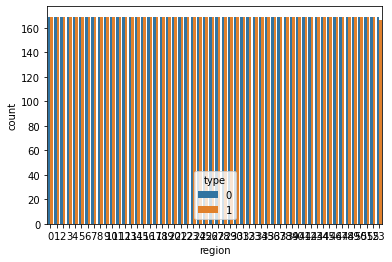

In [28]:
sns.countplot(x='region',hue='type',data=df)

<AxesSubplot:xlabel='AveragePrice', ylabel='Total Bags'>

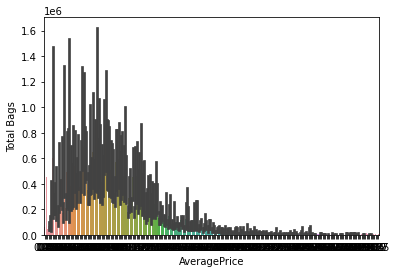

In [29]:
sns.barplot(x='AveragePrice',y='Total Bags',data=df)

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

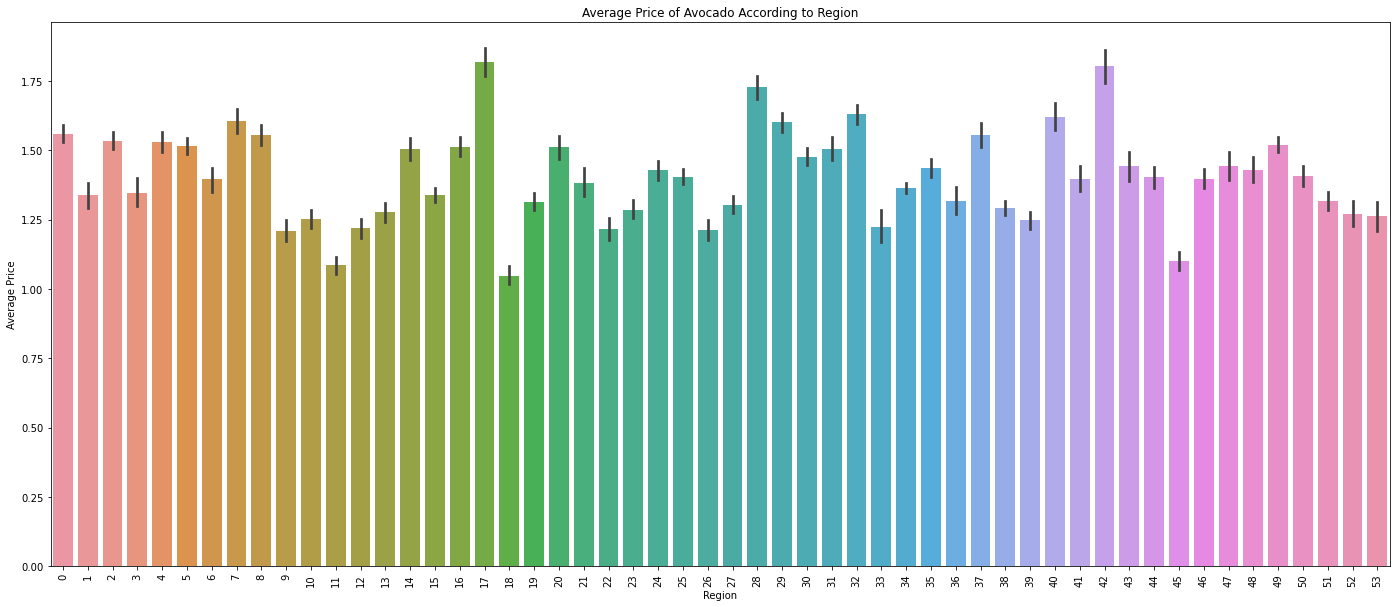

In [30]:
plt.figure(figsize=(24,10))
sns.barplot(y="AveragePrice", x="region", data=df)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

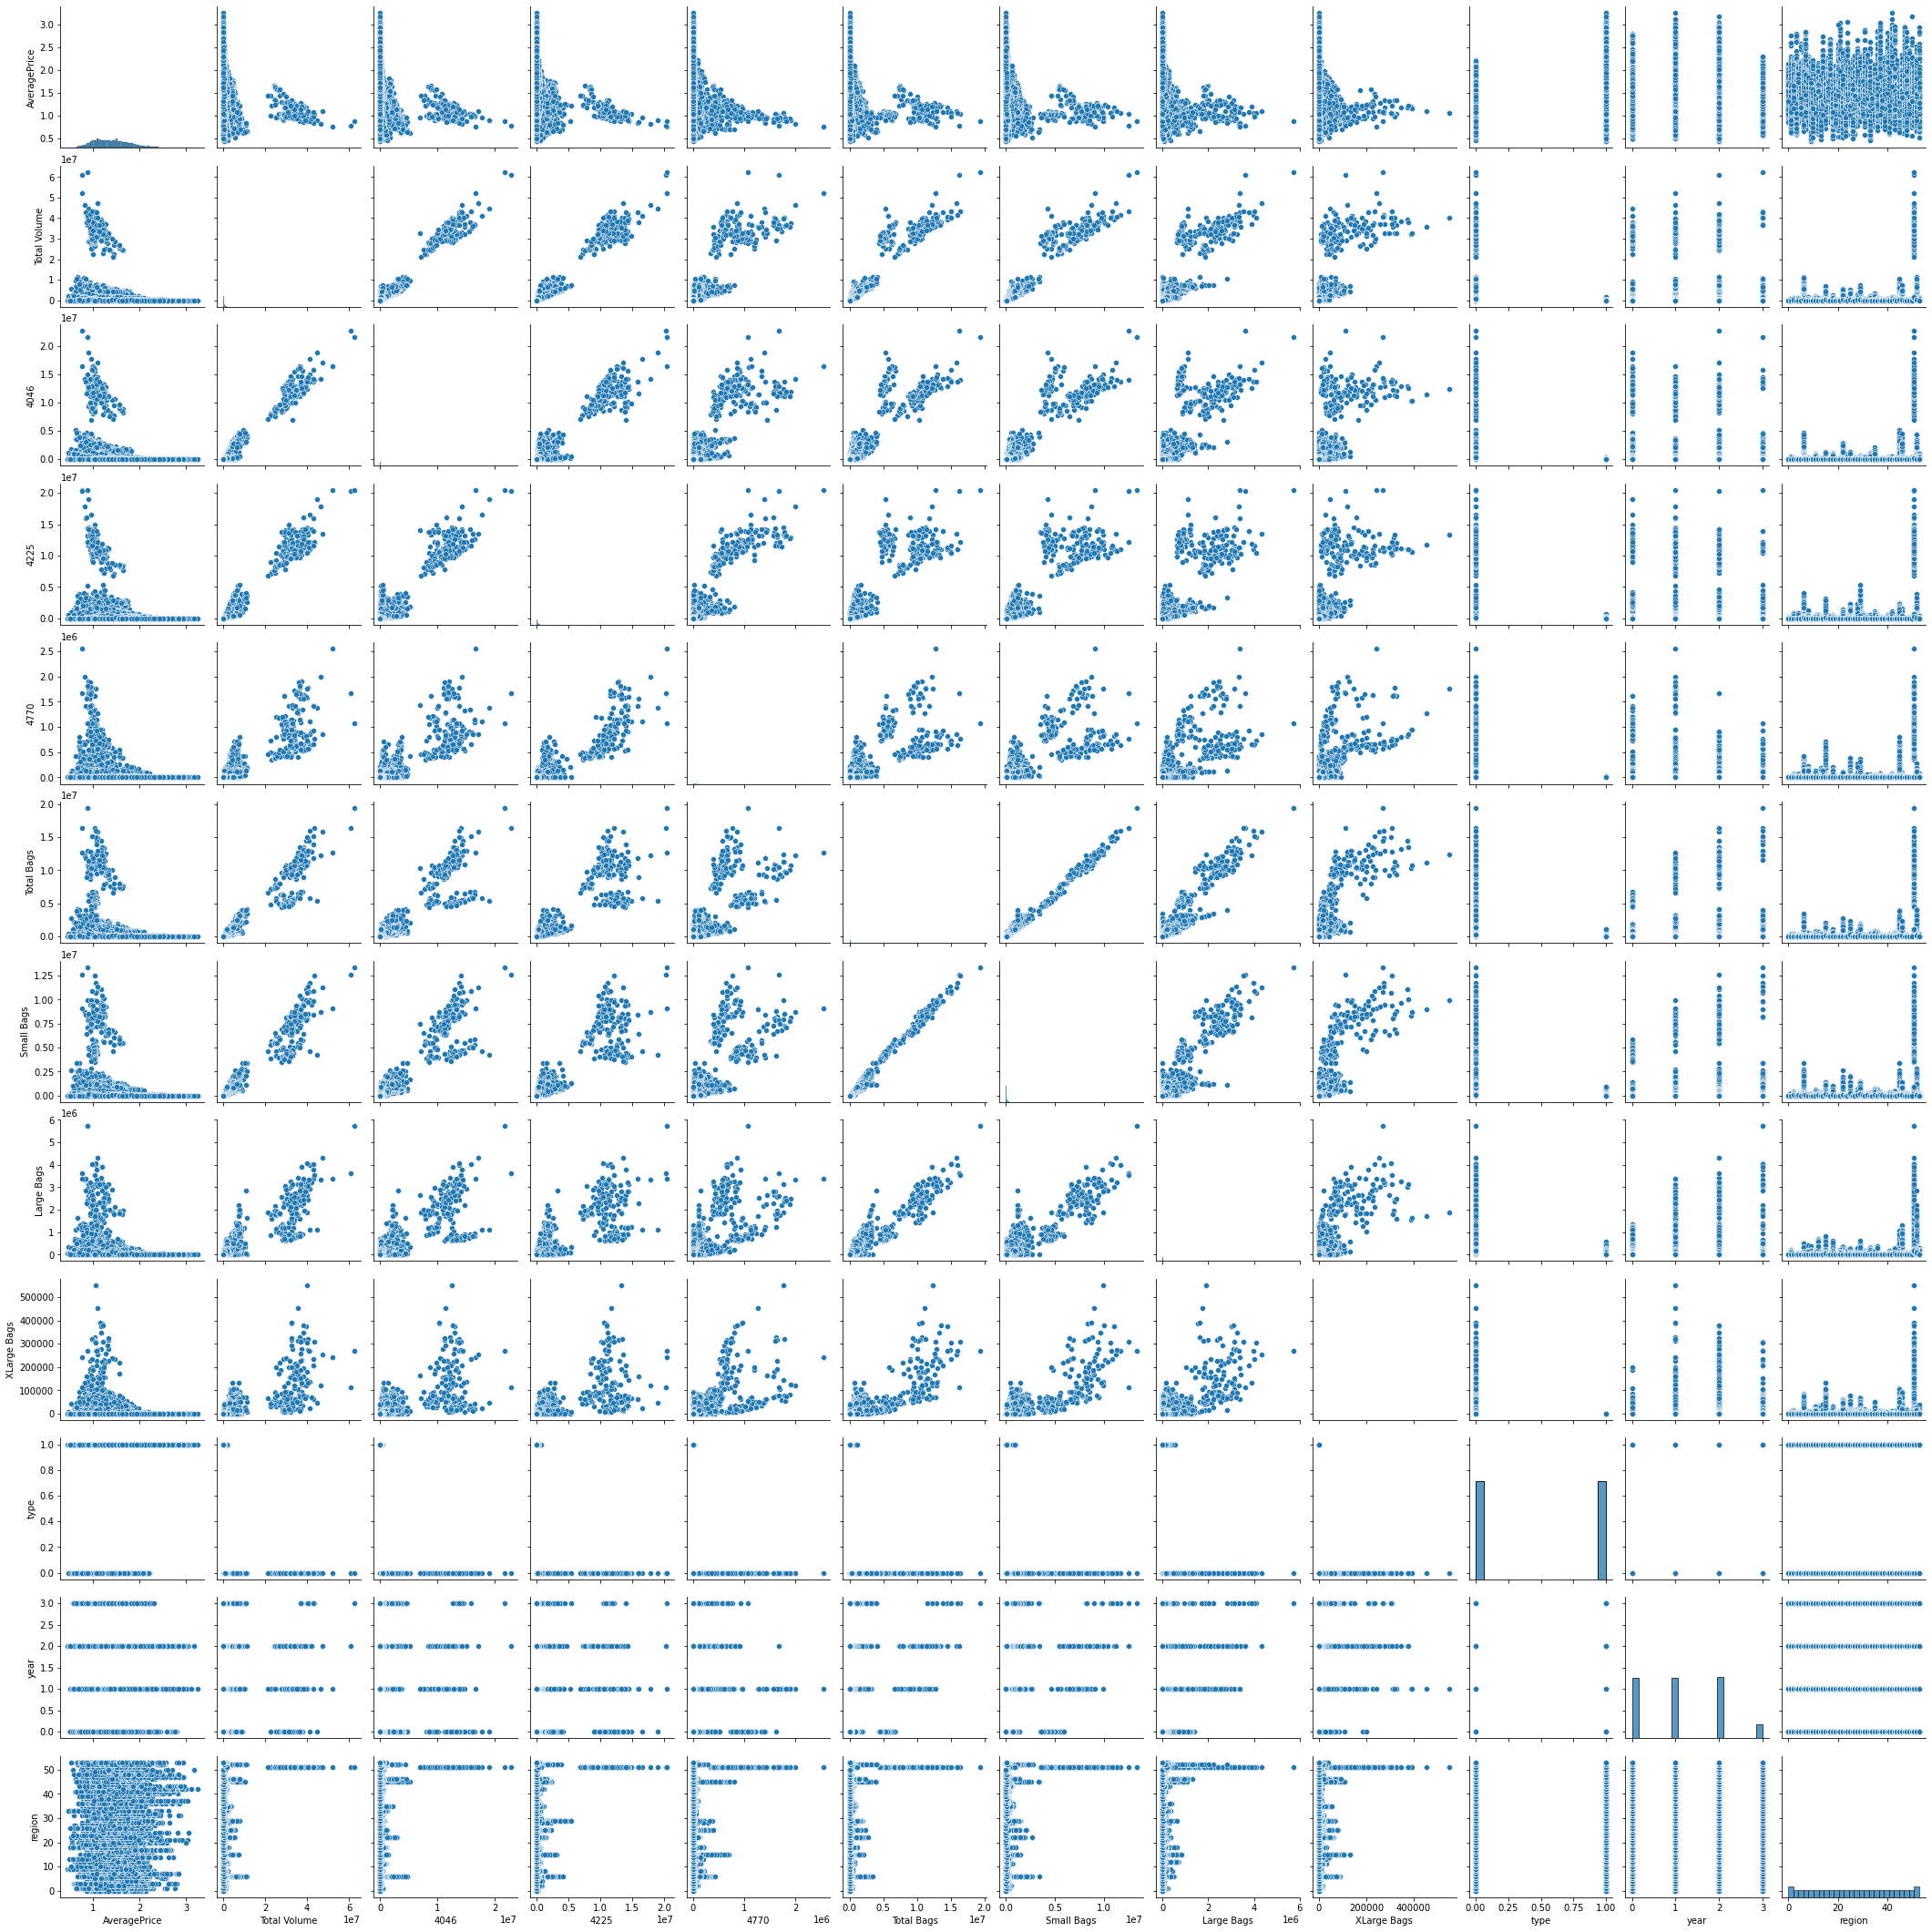

In [31]:
sns.pairplot(df)

# Statistical Analysis

In [32]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,1.147899,26.495644
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,0.000000,13.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,1.000000,26.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2.000000,40.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,3.000000,53.000000


<function matplotlib.pyplot.show(close=None, block=None)>

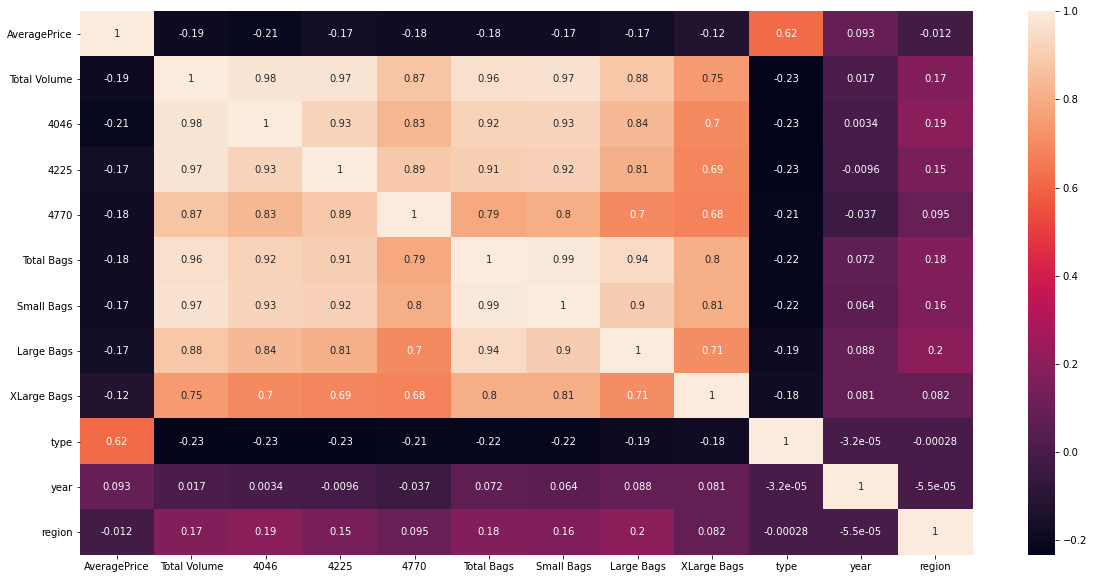

In [33]:
#Observing corelation between the columns through heatmap
##We observe positive correlation between AveragePrice and year only rest are negatively corelated

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show

In [34]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280


In [35]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,3,53
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,3,53
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,3,53
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,3,53


In [36]:
#Dropping date column 
df.drop(columns=["Date"],inplace=True)

### MODELLING

In [37]:
# Assigning input and target variables.
y=df['AveragePrice']
x=df.drop('AveragePrice', axis=1)

In [40]:
# train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#### 1. LINEAR REGRESSION

In [41]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [42]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.2409460594984843
MSE: 0.09752964693889234
RMSE: 0.3122973694075766


**OBSERVATIONS**

Mean Square error is very low.  
RMSE is low as well so our model is trained well.

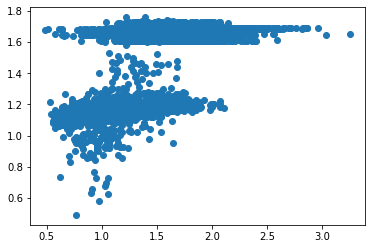

In [43]:
# ytest vs predictions
plt.scatter(x=y_test,y=pred)

#### 2. DECISION TREE REGRESSION

In [44]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)

In [45]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.14584109589041094
MSE: 0.05041906849315069
RMSE: 0.22454190809991503


RMSE value is even lower than Linear Regression

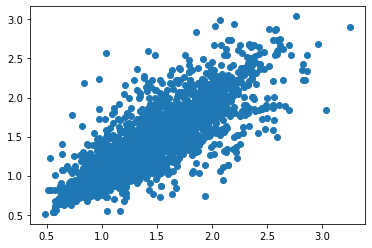

In [46]:
# ytest vs predictions
plt.scatter(x=y_test,y=pred)

#### 3. RANDOM FOREST REGRESSOR

In [47]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)

In [48]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.11033073972602742
MSE: 0.02460996209315068
RMSE: 0.15687562619205916


RMSE is lowest in RadomForestRegressor. So we can save this as the best model.

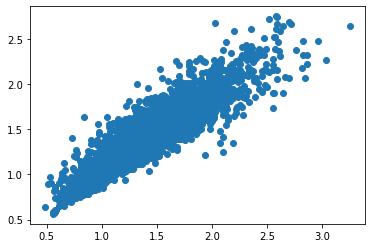

In [49]:
# ytest vs predictions
plt.scatter(x=y_test,y=pred)

#### SAVING THE BEST MODEL

In [50]:
import pickle
# save the model to disk
filename = 'best_model_RFR.pkl'
pickle.dump(rfr,open(filename,'wb'))
#Load the model from disk
loaded_model= pickle.load(open(filename,'rb'))
loaded_model.predict(x_test)

array([1.0181, 0.9861, 1.4204, ..., 0.6013, 1.6792, 2.2029])